# 🌳 Decision Trees (F1 PodiumFinish) — End-to-End Notebook (Gini vs Entropy)

This Colab notebook builds a **Decision Tree classifier from start to finish** using a small, interpretable **Formula 1 (F1) PodiumFinish** dataset.

You will:
- Create a custom categorical dataset
- One‑hot encode features
- Train **two trees**:
  - **CART (Gini impurity)**: `criterion='gini'`
  - **Information Gain (Entropy)**: `criterion='entropy'`
- **Compare tree splits** visually
- Compare **feature importance** with plots
- (Optional) Compute **entropy** and **information gain** manually

---

In [1]:
# If you're running in Colab, you already have most packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 1) Create a small F1 dataset (categorical, interpretable)

In [2]:
data = {
    'Weather': [
        'Wet','Wet','Wet','Wet','Wet',
        'Dry','Dry','Dry','Dry','Wet'
    ],
    'Starting_Position': [
        'Front','Mid','Front','Mid','Back',
        'Front','Mid','Back','Front','Back'
    ],
    'Pit_Strategy': [
        'OneStop','OneStop','TwoStop','TwoStop','OneStop',
        'OneStop','TwoStop','OneStop','TwoStop','TwoStop'
    ],
    'Safety_Car': [
        'Yes','Yes','Yes','Yes','Yes',
        'No','No','No','No','No'
    ],
    'PodiumFinish': [
        'Yes','Yes','Yes','Yes','No',   # Wet + SafetyCar=Yes → Front/Mid = Yes, Back = No
        'Yes','Yes','No','Yes','No'    # Dry / no safety car mostly follows starting position
    ]
}

df = pd.DataFrame(data)
df

,Weather,Starting_Position,Pit_Strategy,Safety_Car,PodiumFinish
0,Wet,Front,OneStop,Yes,Yes
1,Wet,Mid,OneStop,Yes,Yes
2,Wet,Front,TwoStop,Yes,Yes
3,Wet,Mid,TwoStop,Yes,Yes
4,Wet,Back,OneStop,Yes,No
5,Dry,Front,OneStop,No,Yes
6,Dry,Mid,TwoStop,No,Yes
7,Dry,Back,OneStop,No,No
8,Dry,Front,TwoStop,No,Yes
9,Wet,Back,TwoStop,No,No


### Quick sanity checks

In [3]:
print("Shape:", df.shape)
print("\nValue counts for target:")
print(df['PodiumFinish'].value_counts())
print("\nUnique values per feature:")
print(df.drop(columns=['PodiumFinish']).nunique())

Shape: (10, 5)

Value counts for target:
PodiumFinish
Yes    7
No     3
Name: count, dtype: int64

Unique values per feature:
Weather              2
Starting_Position    3
Pit_Strategy         2
Safety_Car           2
dtype: int64


## 2) One‑hot encode categorical features

In [4]:
df_encoded = pd.get_dummies(
    df,
    columns=['Weather', 'Starting_Position', 'Pit_Strategy', 'Safety_Car'],
    drop_first=False
)
df_encoded.head()

,PodiumFinish,Weather_Dry,Weather_Wet,Starting_Position_Back,Starting_Position_Front,Starting_Position_Mid,Pit_Strategy_OneStop,Pit_Strategy_TwoStop,Safety_Car_No,Safety_Car_Yes
0,Yes,False,True,False,True,False,True,False,False,True
1,Yes,False,True,False,False,True,True,False,False,True
2,Yes,False,True,False,True,False,False,True,False,True
3,Yes,False,True,False,False,True,False,True,False,True
4,No,False,True,True,False,False,True,False,False,True


## 3) Split into features (X) and target (y)

In [5]:
X = df_encoded.drop(columns=['PodiumFinish'])
y = df_encoded['PodiumFinish']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10, 9)
y shape: (10,)


## 4) Train Decision Trees (Gini vs Entropy)

In [6]:
# Train/test split (small dataset; this is mainly for demo)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=None)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

print("Trained dt_gini and dt_entropy.")

Trained dt_gini and dt_entropy.


## 5) Evaluate (quick check)

In [7]:
def eval_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

eval_model(dt_gini, "Decision Tree (Gini)")
eval_model(dt_entropy, "Decision Tree (Entropy / Information Gain)")


=== Decision Tree (Gini) ===
              precision    recall  f1-score   support

          No      1.000     1.000     1.000         1
         Yes      1.000     1.000     1.000         2

    accuracy                          1.000         3
   macro avg      1.000     1.000     1.000         3
weighted avg      1.000     1.000     1.000         3

Confusion matrix:
[[1 0]
 [0 2]]

=== Decision Tree (Entropy / Information Gain) ===
              precision    recall  f1-score   support

          No      1.000     1.000     1.000         1
         Yes      1.000     1.000     1.000         2

    accuracy                          1.000         3
   macro avg      1.000     1.000     1.000         3
weighted avg      1.000     1.000     1.000         3

Confusion matrix:
[[1 0]
 [0 2]]


## 6) Compare tree splits with plots

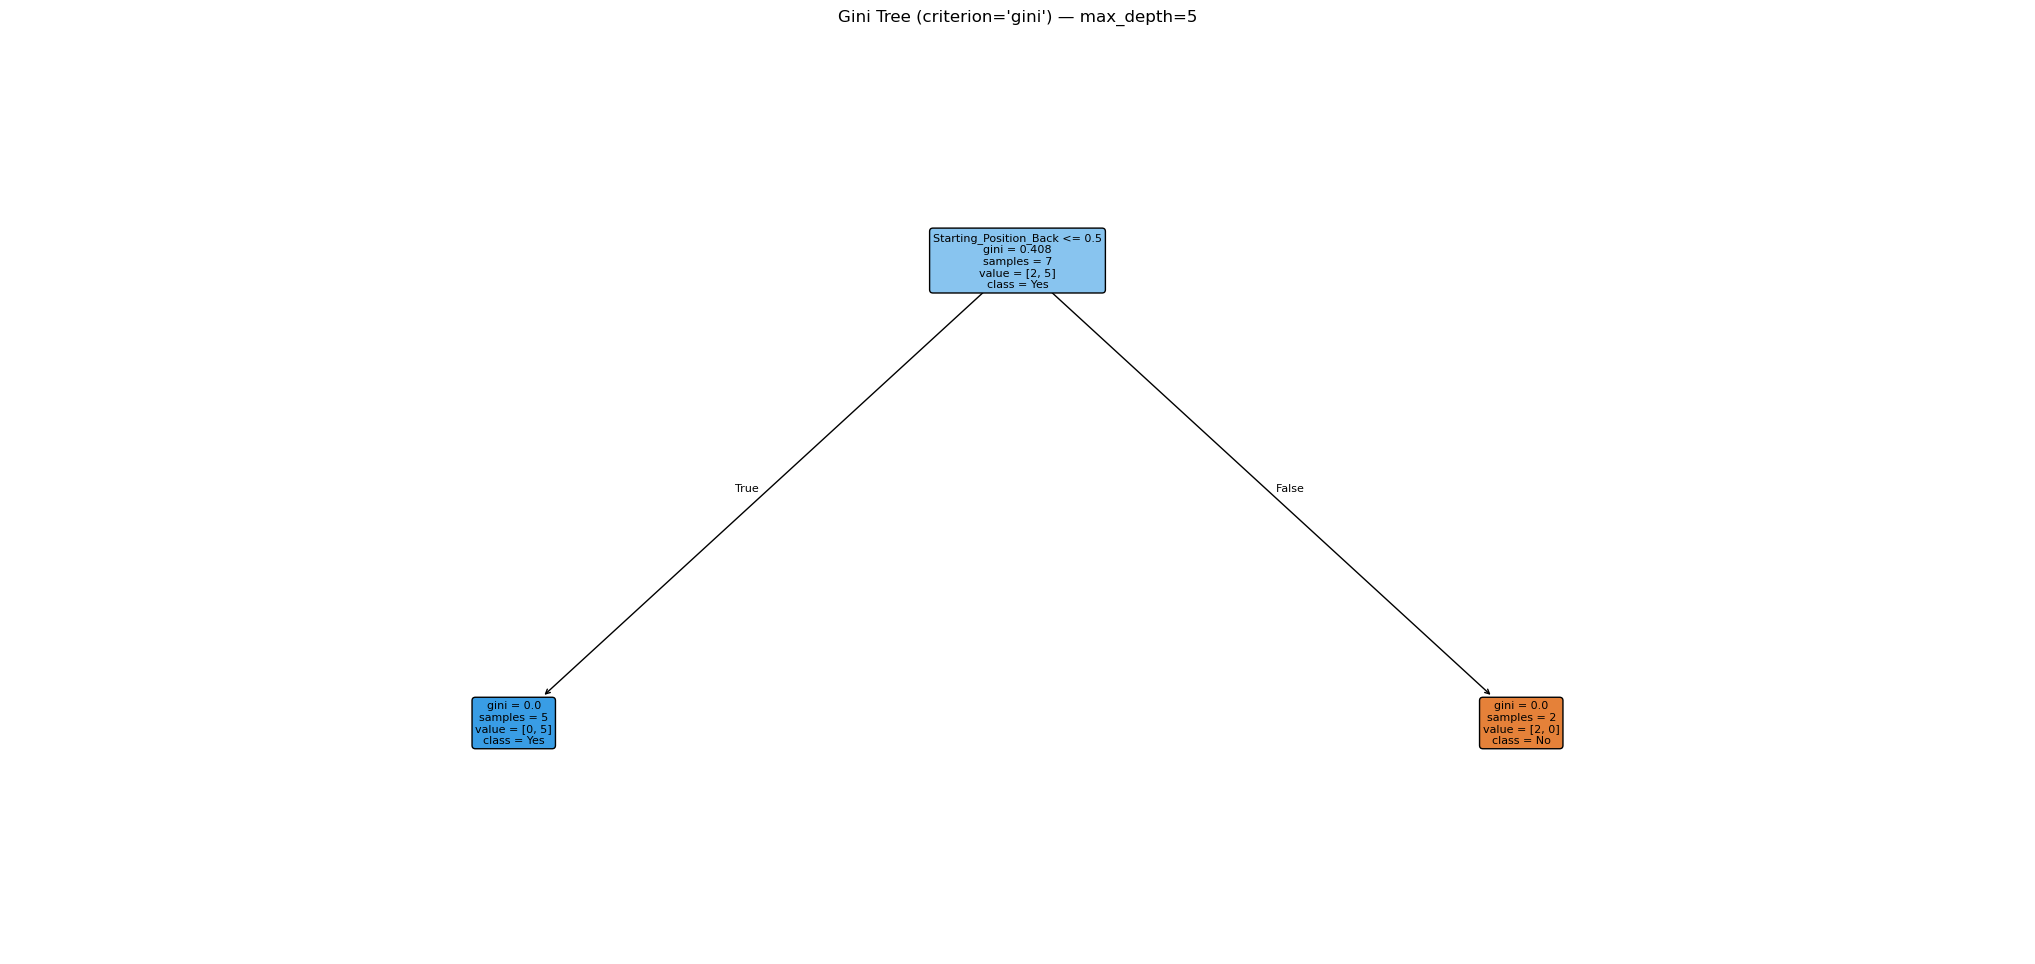

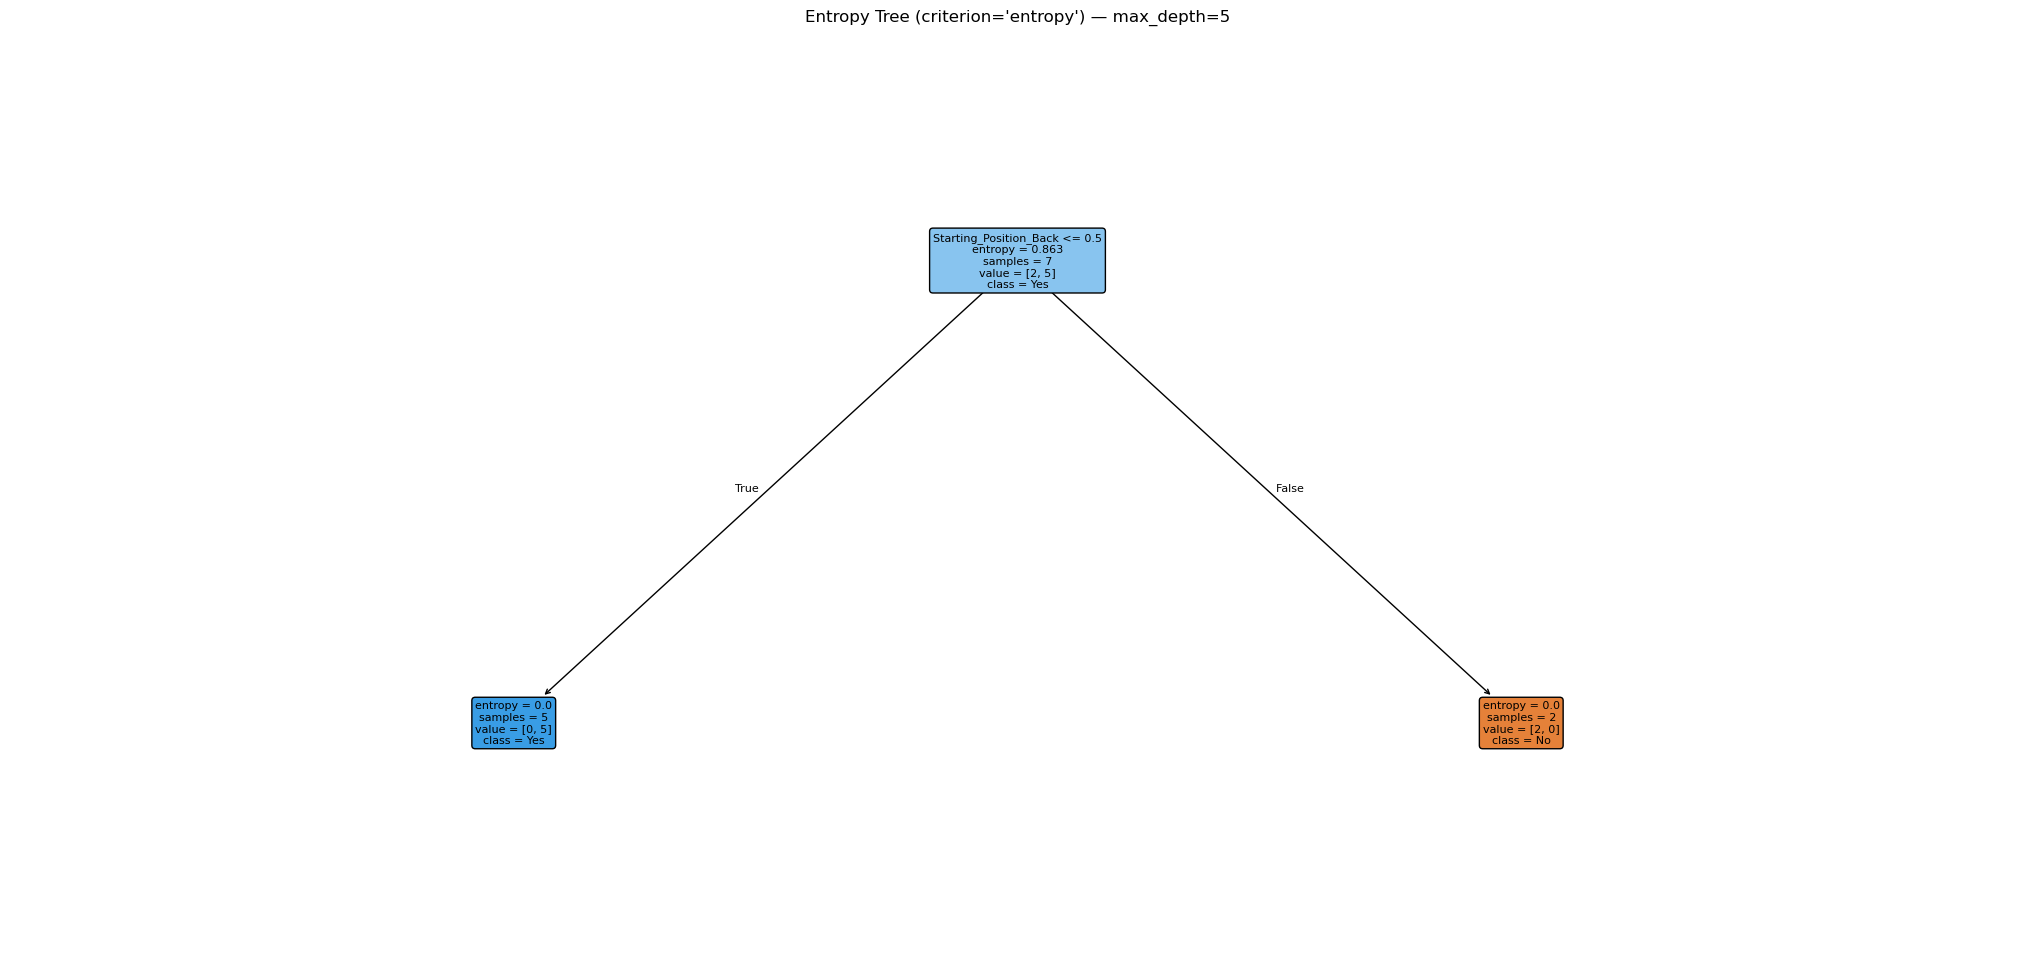

In [8]:
# Plot both trees using the same max_depth so you can compare splits fairly
max_depth_to_show = 5

plt.figure(figsize=(26, 12))
plot_tree(
    dt_gini,
    feature_names=X.columns,
    class_names=['No','Yes'],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=max_depth_to_show
)
plt.title(f"Gini Tree (criterion='gini') — max_depth={max_depth_to_show}")
plt.show()

plt.figure(figsize=(26, 12))
plot_tree(
    dt_entropy,
    feature_names=X.columns,
    class_names=['No','Yes'],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=max_depth_to_show
)
plt.title(f"Entropy Tree (criterion='entropy') — max_depth={max_depth_to_show}")
plt.show()

## 7) Compare feature importance (plots)

In [9]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Gini_Importance": dt_gini.feature_importances_,
    "Entropy_Importance": dt_entropy.feature_importances_
})

# Sort by Gini importance for readability
importance_df_sorted = importance_df.sort_values("Gini_Importance", ascending=False)
importance_df_sorted.head(20)

,Feature,Gini_Importance,Entropy_Importance
2,Starting_Position_Back,1.0,1.0
0,Weather_Dry,0.0,0.0
1,Weather_Wet,0.0,0.0
3,Starting_Position_Front,0.0,0.0
4,Starting_Position_Mid,0.0,0.0
5,Pit_Strategy_OneStop,0.0,0.0
6,Pit_Strategy_TwoStop,0.0,0.0
7,Safety_Car_No,0.0,0.0
8,Safety_Car_Yes,0.0,0.0


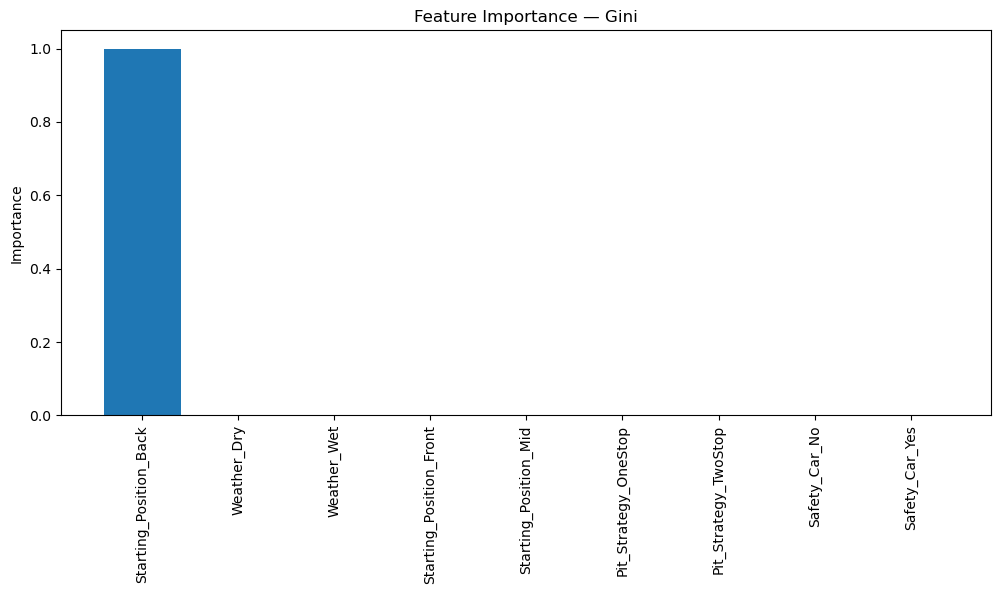

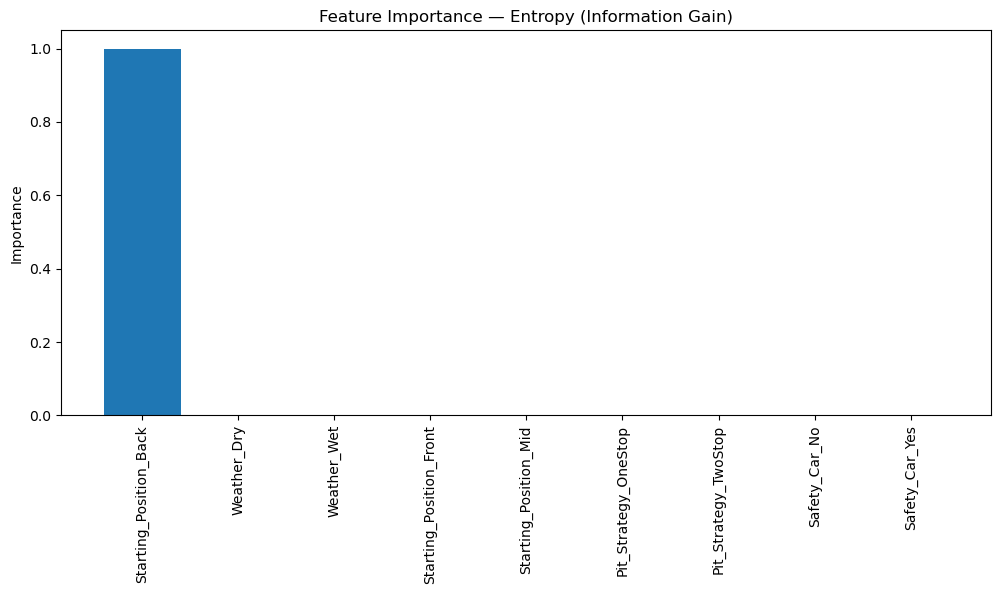

In [10]:
# Bar chart: Gini importances
plt.figure(figsize=(12, 5))
plt.bar(importance_df_sorted["Feature"], importance_df_sorted["Gini_Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance — Gini")
plt.ylabel("Importance")
plt.show()

# Bar chart: Entropy importances
importance_df_sorted2 = importance_df.sort_values("Entropy_Importance", ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(importance_df_sorted2["Feature"], importance_df_sorted2["Entropy_Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance — Entropy (Information Gain)")
plt.ylabel("Importance")
plt.show()

## 8) (Optional) Manual Entropy & Information Gain (for learning)

In [11]:
def entropy(y_series):
    values, counts = np.unique(y_series, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

def information_gain(df_raw, feature, target):
    parent_entropy = entropy(df_raw[target])
    total = len(df_raw)
    weighted_child_entropy = 0.0

    for _, subset in df_raw.groupby(feature):
        weight = len(subset) / total
        weighted_child_entropy += weight * entropy(subset[target])

    return parent_entropy - weighted_child_entropy

target = "PodiumFinish"
features = [c for c in df.columns if c != target]

root_entropy = entropy(df[target])
print("Root Entropy:", round(root_entropy, 4))

ig_table = []
for f in features:
    ig_table.append((f, information_gain(df, f, target)))

ig_df = pd.DataFrame(ig_table, columns=["Feature", "Information_Gain"]).sort_values("Information_Gain", ascending=False)
ig_df

Root Entropy: 0.8813


,Feature,Information_Gain
1,Starting_Position,0.881291
2,Pit_Strategy,0.034852
3,Safety_Car,0.034852
0,Weather,0.005802


## 9) Notes

- With small datasets, trees can become **very confident** quickly.
- `criterion='gini'` and `criterion='entropy'` often pick similar early splits, but can diverge deeper in the tree.
- If you want a deeper / more complex tree, increase dataset size or add controlled noise.